Imports

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

Loading Files

In [98]:
lapTimes = pd.read_csv('Dataset/lap_times.csv')
races = pd.read_csv('Dataset/races.csv')
drivers = pd.read_csv('Dataset/drivers.csv')
results = pd.read_csv('Dataset/results.csv')
circuits = pd.read_csv('Dataset/circuits.csv')
status = pd.read_csv('Dataset/status.csv')

In [99]:
results['position'].replace(r'\N',np.nan,inplace = True)

In [100]:
results['position']

0          1
1          2
2          3
3          4
4          5
        ... 
24615     16
24616     17
24617     18
24618     19
24619    NaN
Name: position, Length: 24620, dtype: object

In [101]:
top_100 = pd.read_csv('Dataset/Top100Races.csv')

In [102]:
df_scores = top_100

In [103]:
df_scores.head()

,raceId,year,name,points
0,879,2012,Brazilian Grand Prix,9.45
1,1020,2019,German Grand Prix,9.44
2,843,2011,Chinese Grand Prix,9.24
3,906,2014,Canadian Grand Prix,9.19
4,910,2014,Hungarian Grand Prix,9.14


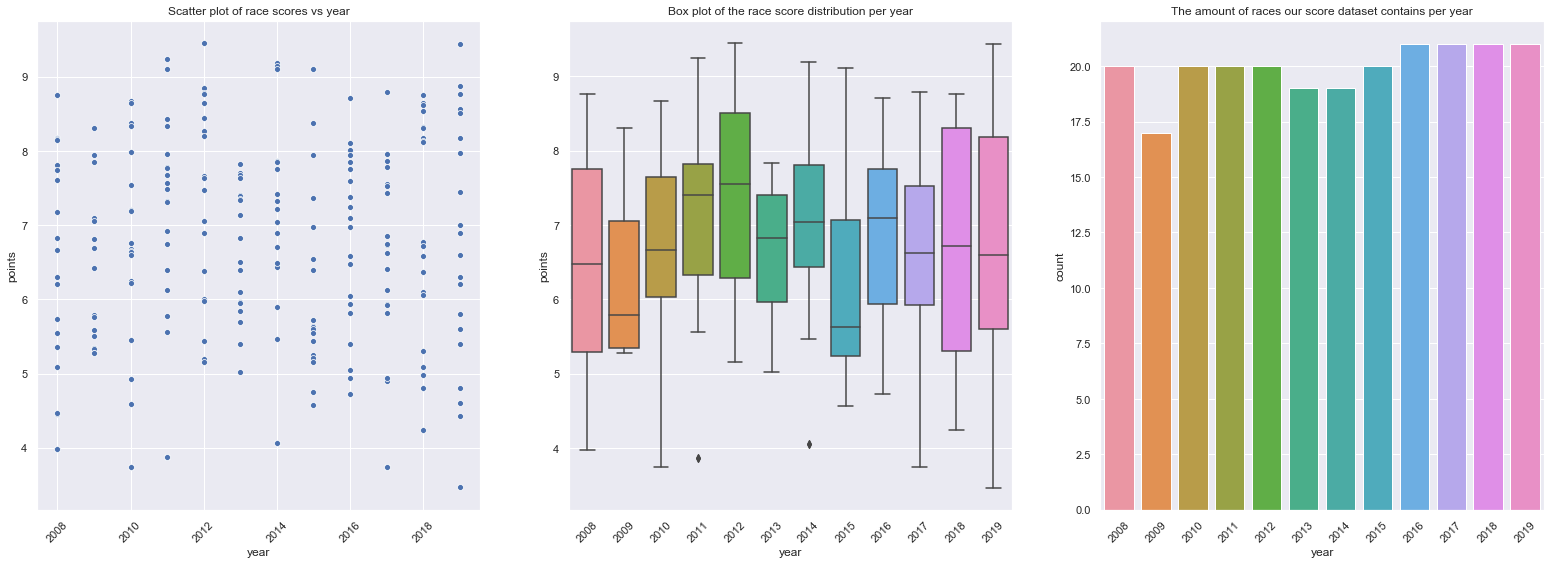

In [6]:
fig = plt.figure(figsize=(27,9))
plt.subplot(1,3,1)
plt.title('Scatter plot of race scores vs year')
_ = sns.scatterplot(x='year', y='points', data=top_100)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
plt.title('Box plot of the race score distribution per year')
_ = sns.boxplot(x='year', y='points', data=top_100)
plt.xticks(rotation='45')
plt.subplot(1,3,3)
plt.title('The amount of races our score dataset contains per year')
_ = sns.countplot(x='year', data=top_100)
plt.xticks(rotation='45')
plt.show()

In [7]:
print(df_scores.groupby('name').points.mean().sort_values(ascending=False))
meanscores = df_scores.groupby('name').points.mean().sort_values(ascending=False)

name
United States Grand Prix    7.522500
British Grand Prix          7.470000
South Korean Grand Prix     7.445000
Bahrain Grand Prix          7.249091
Brazilian Grand Prix        7.205385
Austrian Grand Prix         7.203333
Belgian Grand Prix          7.147500
Hungarian Grand Prix        7.077500
Canadian Grand Prix         7.064545
Malaysian Grand Prix        7.047000
Australian Grand Prix       7.042500
Italian Grand Prix          6.945833
German Grand Prix           6.921818
Azerbaijan Grand Prix       6.865000
Chinese Grand Prix          6.863846
Turkish Grand Prix          6.847500
Japanese Grand Prix         6.560000
Monaco Grand Prix           6.322500
Mexican Grand Prix          6.310000
Singapore Grand Prix        6.238333
Spanish Grand Prix          6.205833
Korean Grand Prix           6.040000
Abu Dhabi Grand Prix        5.948333
Indian Grand Prix           5.750000
Russian Grand Prix          5.141429
French Grand Prix           5.130000
European Grand Prix         5.038

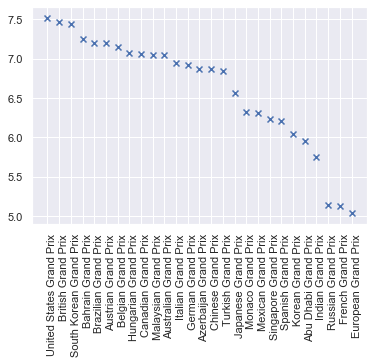

In [8]:
plt.scatter(meanscores.index,meanscores,marker='x')
plt.tick_params(axis = 'x',which='major')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")
plt.show()

Amount of DNF affect the score

In [51]:
print(results[results['raceId'] == 973][['resultId', 'raceId', 'driverId','grid', 'position', 'statusId']])

       resultId  raceId  driverId  grid position  statusId
23454     23459     973         1     1        1         1
23455     23460     973        20     2        2         1
23456     23461     973       817     6        3         1
23457     23462     973       815     8        4        11
23458     23463     973       839    10        5        11
23459     23464     973       807    13        6        11
23460     23465     973       832    12        7        11
23461     23466     973       836    15        8        11
23462     23467     973       826    19        9        11
23463     23468     973       154    14       10        11
23464     23469     973       828    16       11        12
23465     23470     973         4     7       12        12
23466     23471     973        13     9       13        12
23467     23472     973       825    11       14        12
23468     23473     973       835    17       15        12
23469     23474     973       840    18       16        

In [52]:
print(status[status['statusId'].isin([131, 4, 130])])

     statusId            status
3           4         Collision
127       130  Collision damage
128       131        Power Unit


In [53]:
df = pd.merge(left=df_scores, right=races, on='raceId', how='left')
df = df.dropna(axis=0)
print(df.columns)
print(len(df))

Index(['raceId', 'year_x', 'name_x', 'points', 'year_y', 'round', 'circuitId',
       'name_y', 'date', 'time', 'url'],
      dtype='object')
239


In [12]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [13]:
print(status[status['statusId'].isin([1, 11, 12, 13, 14, 15, 16, 17, 18, 19])])

    statusId    status
0          1  Finished
10        11    +1 Lap
11        12   +2 Laps
12        13   +3 Laps
13        14   +4 Laps
14        15   +5 Laps
15        16   +6 Laps
16        17   +7 Laps
17        18   +8 Laps
18        19   +9 Laps


In [54]:
def count_dnf(_results, _raceid):
    # Count the number of "did not finished" per race
    # for each result, there is a statusId and a collection of these signify that the driver
    # finished,
    dnf_count = 0
    finished_status = [1, 11, 12, 13, 14, 15, 16, 17, 18, 19]   # theses statusId are given when a driver finishes

    for iter_status in _results[_results['raceId'] == _raceid]['statusId']:
        if iter_status not in finished_status:
            dnf_count += 1
        else:
            pass

    return dnf_count

In [55]:
df['dnf'] = df.raceId.apply(lambda x: count_dnf(results, x))

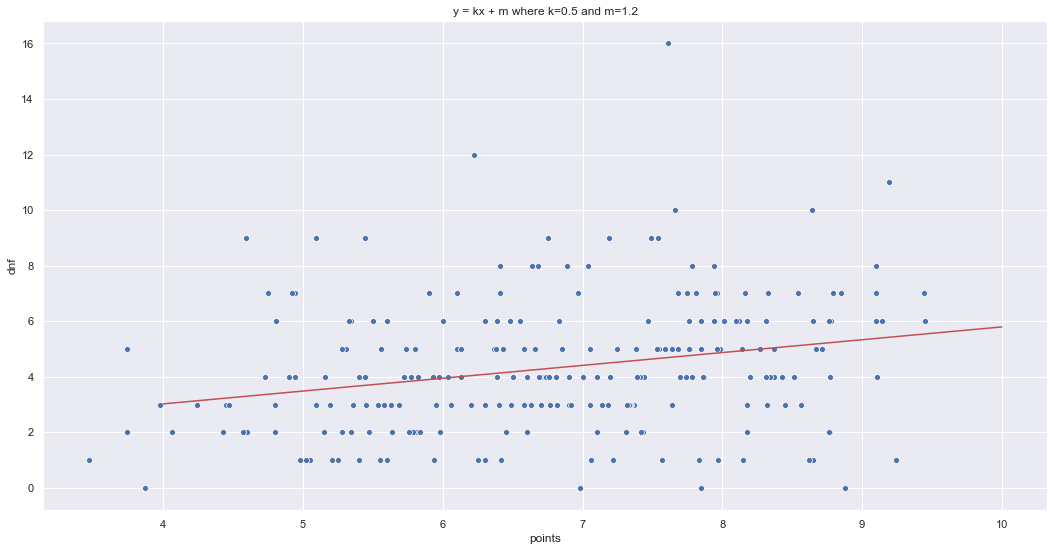

In [56]:
fig = plt.figure(figsize=(18,9))
_ = sns.scatterplot(x='points', y='dnf', data=df)
pf = np.polyfit(x=df.points, y=df.dnf, deg=1)
_ = plt.plot(np.linspace(4, 10, len(df)), pf[0]*np.linspace(4, 10, len(df)) + pf[1], 'r')
plt.title('y = kx + m where k=' + str(round(pf[0],1)) + " and m=" + str(round(pf[1],1)))
plt.show()

In [17]:
dnf_points_p = df[['points','dnf']].corr()
print(dnf_points_p)

          points       dnf
points  1.000000  0.269304
dnf     0.269304  1.000000


Text(0.5, 1.0, 'Driver standings druing Barcelona 2012 Grand Prix')

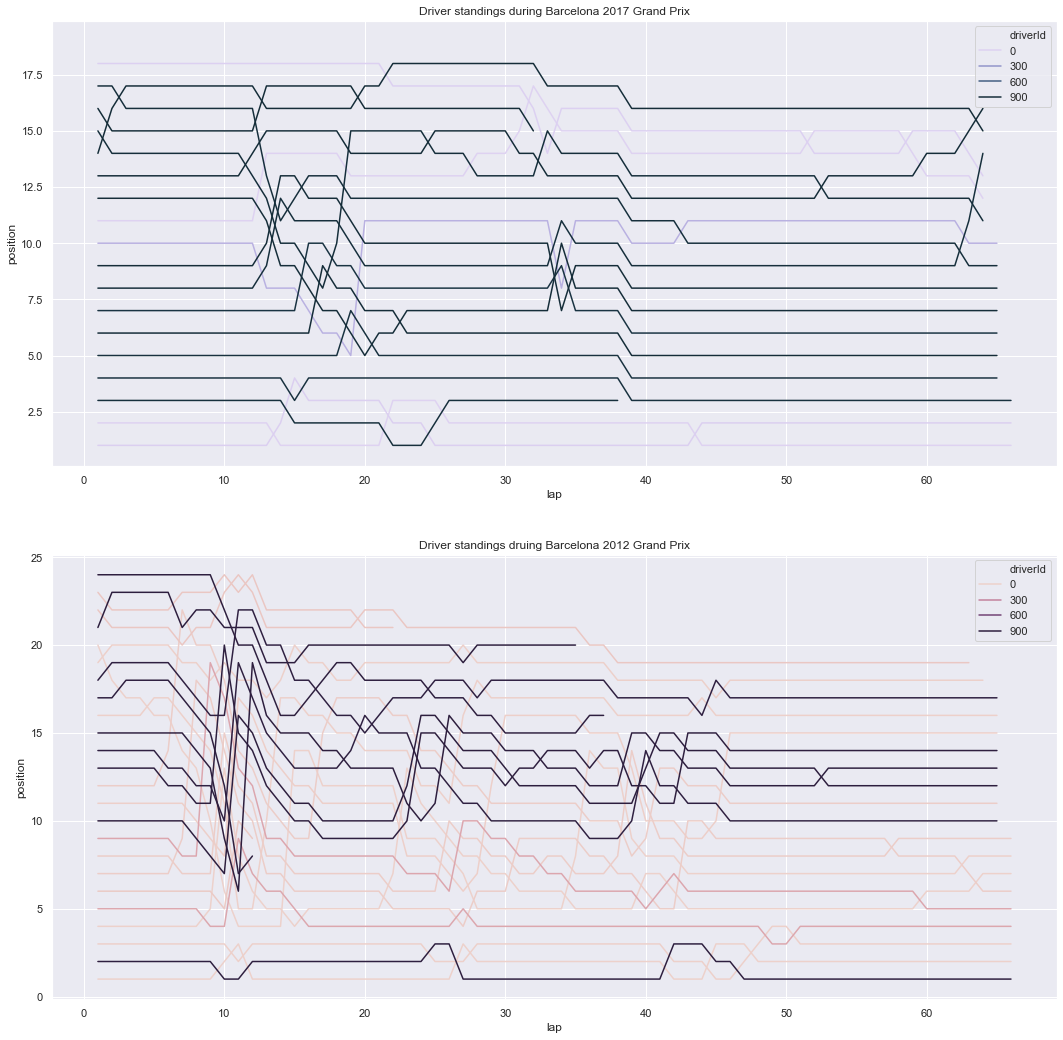

In [18]:
fig = plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
_ = sns.lineplot(x='lap', y='position', hue='driverId', data=lapTimes[lapTimes['raceId'] == 973], palette="ch:2.5,.25")
plt.title('Driver standings during Barcelona 2017 Grand Prix')
plt.subplot(2,1,2)
_ = sns.lineplot(x='lap', y='position', hue='driverId', data=lapTimes[lapTimes['raceId'] == 864])
plt.title('Driver standings druing Barcelona 2012 Grand Prix')

In [19]:
def count_overtakings(laptimes, raceid):
    # Number of overtakings
    # The theory here is that when one driver changes his or her position between two adjacent laps, then an overtaking
    # has occurred. Counting the number of occurences this way, and then divide by 2 will give us the number of
    # overtakings since 1 overtaking includes one driver advancing one position, while the other loses one.

    competing_drivers = []
    for driver in laptimes[laptimes.raceId == raceid].driverId:
        if driver not in competing_drivers:
            competing_drivers.append(driver)

    previous_position = 0
    overtakings = 0
    for driver in competing_drivers:
        for lapPosition in laptimes[(laptimes.raceId == raceid) & (laptimes.driverId == driver)].position:
            if lapPosition != previous_position:
                previous_position = lapPosition
                overtakings += 1

    return int(overtakings/2)

In [120]:
df['overtakings'] = df.raceId.apply(lambda x: count_overtakings(lapTimes, x))

Text(0.5, 1.0, 'y = kx + m where k=12.6 and m=31.3')

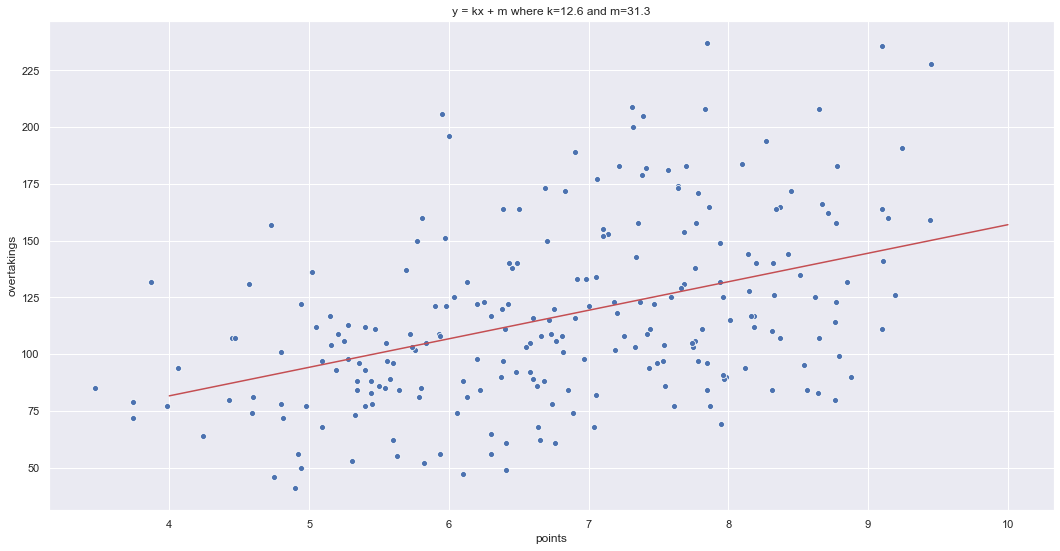

In [21]:
fig = plt.figure(figsize=(18,9))
_ = sns.scatterplot(x='points', y='overtakings', data=df)
pf = np.polyfit(x=df.points, y=df.overtakings, deg=1)
_ = plt.plot(np.linspace(4, 10, len(df)), pf[0]*np.linspace(4, 10, len(df)) + pf[1], 'r')
plt.title('y = kx + m where k=' + str(round(pf[0],1)) + " and m=" + str(round(pf[1],1)))

In [22]:
dnf_overtakings_p = df[['points','overtakings']].corr()
print(dnf_overtakings_p)

               points  overtakings
points       1.000000     0.445873
overtakings  0.445873     1.000000


In [75]:
results.position

0         1
1         2
2         3
3         4
4         5
         ..
24615    16
24616    17
24617    18
24618    19
24619    19
Name: position, Length: 24620, dtype: object

In [113]:
def get_top_5_battle(raceid, results, laptimes):
    # Focus in a race is usually on the drivers in the top, so a measurement of how their "battle" is taking shape
    # throughout the race could be interesting to measure.
    # We will approach this by looking at the variance in positions for the drivers who end up in top 5
    topp_5=[1,2,3,4,5]
    f_top_5 = results[(results.raceId == raceid) & ((results.position).astype('float64') <6)].sort_values(['position'], ascending=True)
    f_top_5_var = []

    for f_driver in f_top_5.driverId:
        f_t5_var = np.var(laptimes[(laptimes.driverId == f_driver) & (laptimes.raceId == raceid)].position)
        f_top_5_var.append(f_t5_var)

    f_top5score = 0
    for f_itervar in f_top_5_var:
        f_top5score = f_top5score + f_itervar

    return f_top5score

In [114]:
df['top5_battle'] = df.raceId.apply(lambda x: get_top_5_battle(x, results, lapTimes))

Text(0.5, 1.0, 'y = kx + m where k=4.3 and m=-15.9')

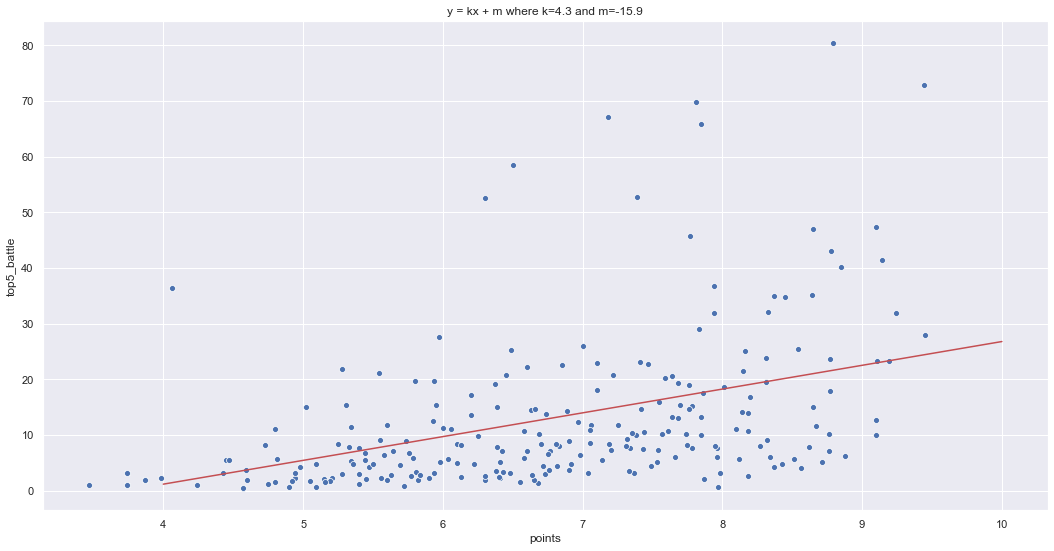

In [115]:
fig = plt.figure(figsize=(18,9))
_ = sns.scatterplot(x='points', y='top5_battle', data=df)
pf = np.polyfit(x=df.points, y=df.top5_battle, deg=1)
_ = plt.plot(np.linspace(4, 10, len(df)), pf[0]*np.linspace(4, 10, len(df)) + pf[1], 'r')
plt.title('y = kx + m where k=' + str(round(pf[0],1)) + " and m=" + str(round(pf[1],1)))

In [116]:
dnf_top5_p = df[['points','top5_battle']].corr()
print(dnf_top5_p)

               points  top5_battle
points       1.000000     0.426705
top5_battle  0.426705     1.000000


In [68]:
(results.position)

0          1
1          2
2          3
3          4
4          5
        ... 
24615     16
24616     17
24617     18
24618     19
24619    NaN
Name: position, Length: 24620, dtype: object

In [109]:
def get_rank_vs_position(raceid, results):
    # How are the drivers rank affecting the overall satisfaction score of a race?
    # We want to test and see if the rank of the drivers in top 5 affects how good a race is, in layman's terms:
    # If a low-ranked driver finished top 5, is it more worth than if a top ranked driver wins the rays?
    f_top_5 = results[(results.raceId == raceid) & ((results.position).astype('float64')<6)].sort_values(['position'], ascending=True)

    rvp_score = 0
    for position, rank in zip(f_top_5['position'].astype(int), f_top_5['rank'].astype(int)):
        rvp_score += abs(position - rank)

    return rvp_score

In [110]:
df['rvp'] = df.raceId.apply(lambda x: get_rank_vs_position(x, results))

Text(0.5, 1.0, 'y = kx + m where k=1.0 and m=4.7')

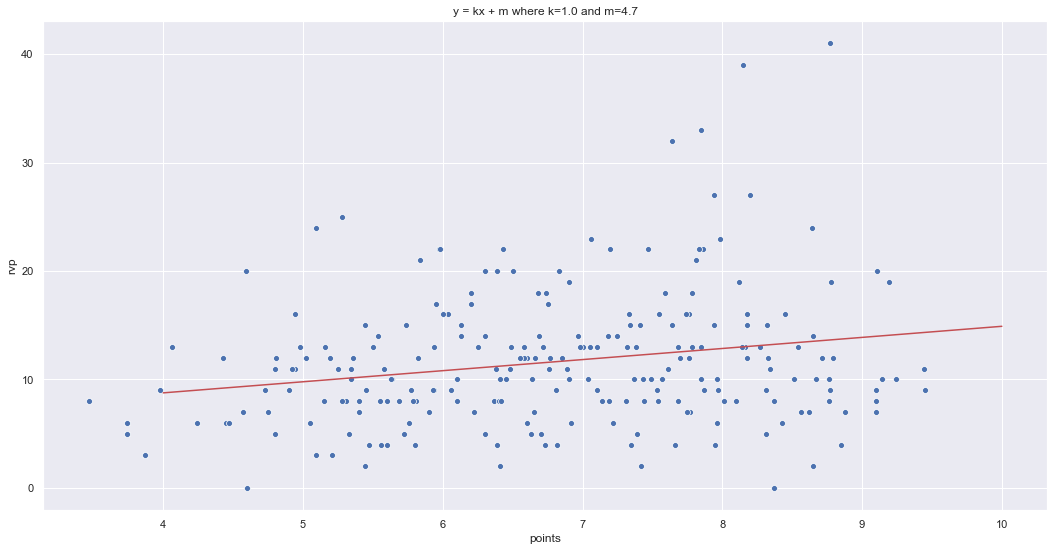

In [111]:
fig = plt.figure(figsize=(18,9))
_ = sns.scatterplot(x='points', y='rvp', data=df)
pf = np.polyfit(x=df.points, y=df.rvp, deg=1)
_ = plt.plot(np.linspace(4, 10, len(df)), pf[0]*np.linspace(4, 10, len(df)) + pf[1], 'r')
plt.title('y = kx + m where k=' + str(round(pf[0],1)) + " and m=" + str(round(pf[1],1)))

In [112]:
dnf_rvp_p = df[['points','rvp']].corr()
print(dnf_rvp_p)

          points       rvp
points  1.000000  0.229617
rvp     0.229617  1.000000


In [242]:
dfsave = df[['raceId','dnf','overtakings','top5_battle','rvp','points']]
dfsave.head()

,raceId,dnf,overtakings,top5_battle,rvp,points
0,879,6,228,27.911129,9,9.45
1,1020,7,159,72.959473,11,9.44
2,843,1,191,31.969707,10,9.24
3,906,11,126,23.286327,19,9.19
4,910,6,160,41.467551,10,9.14


In [243]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('RegressionData.xlsx')
dfsave.to_excel(writer)
writer.save()

# DF TO CSV
dfsave.to_csv('RegressionData.csv', sep=',')

In [118]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
import optuna # Library we use for hyperparameter tuning

In [121]:
X = df[['raceId','dnf','overtakings','top5_battle','rvp']]
y = df['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
# Hyperparameter tuning
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    op_params = {
        'gamma': trial.suggest_uniform('gamma', 0.1, 1),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.1, 0.9),
        'max_depth': trial.suggest_int('max_depth', 1, 5),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 10000),
        'col_sample_by_tree': trial.suggest_uniform('col_sample_by_tree', 0.1, 0.5),
        'booster': 'gbtree'
    }
    
    op_model = xgb.train(op_params, dtrain)
    op_preds = op_model.predict(dtest)
    
    return MSE(op_preds, y_test)

study = optuna.create_study()
study.optimize(objective, n_trials=30)

[21:12:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:43,780] Finished trial#0 with value: 1.8554131788478072 with parameters: {'gamma': 0.33833903421530614, 'learning_rate': 0.7264797484085718, 'max_depth': 2, 'n_estimators': 4359, 'col_sample_by_tree': 0.10397575677659421}. Best is trial#0 with value: 1.8554131788478072.


[21:12:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:43,929] Finished trial#1 with value: 1.697690308887343 with parameters: {'gamma': 0.17825468635444114, 'learning_rate': 0.6977213844523074, 'max_depth': 1, 'n_estimators': 2074, 'col_sample_by_tree': 0.3939957954297598}. Best is trial#1 with value: 1.697690308887343.


[21:12:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,084] Finished trial#2 with value: 1.5357341976835637 with parameters: {'gamma': 0.6573060005454844, 'learning_rate': 0.4661248384131278, 'max_depth': 4, 'n_estimators': 7136, 'col_sample_by_tree': 0.2703947768437238}. Best is trial#2 with value: 1.5357341976835637.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,240] Finished trial#3 with value: 1.5111202642303379 with parameters: {'gamma': 0.7810305341951042, 'learning_rate': 0.40100914853432446, 'max_depth': 5, 'n_estimators': 7852, 'col_sample_by_tree': 0.25354270669385626}. Best is trial#3 with value: 1.5111202642303379.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,404] Finished trial#4 with value: 1.5850113300070268 with parameters: {'gamma': 0.8130788715015925, 'learning_rate': 0.2352087264041483, 'max_depth': 3, 'n_estimators': 1833, 'col_sample_by_tree': 0.2159879464061453}. Best is trial#3 with value: 1.5111202642303379.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,625] Finished trial#5 with value: 1.7560273726412006 with parameters: {'gamma': 0.8813104528433322, 'learning_rate': 0.8144734739135945, 'max_depth': 4, 'n_estimators': 2179, 'col_sample_by_tree': 0.21199941022531857}. Best is trial#3 with value: 1.5111202642303379.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,794] Finished trial#6 with value: 1.7112915680046648 with parameters: {'gamma': 0.7198806640056779, 'learning_rate': 0.20406455112985233, 'max_depth': 5, 'n_estimators': 7967, 'col_sample_by_tree': 0.23886450781368854}. Best is trial#3 with value: 1.5111202642303379.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:44,968] Finished trial#7 with value: 1.464395611367395 with parameters: {'gamma': 0.449873528267547, 'learning_rate': 0.2504066606489766, 'max_depth': 5, 'n_estimators': 6746, 'col_sample_by_tree': 0.48443851237276814}. Best is trial#7 with value: 1.464395611367395.


[21:12:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:45,173] Finished trial#8 with value: 3.474619075478538 with parameters: {'gamma': 0.7881560562392166, 'learning_rate': 0.13300041318231104, 'max_depth': 4, 'n_estimators': 1358, 'col_sample_by_tree': 0.1523124191245514}. Best is trial#7 with value: 1.464395611367395.


[21:12:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:45,323] Finished trial#9 with value: 4.840954551480515 with parameters: {'gamma': 0.4474419708930608, 'learning_rate': 0.10960464340451868, 'max_depth': 2, 'n_estimators': 7551, 'col_sample_by_tree': 0.36132917808202814}. Best is trial#7 with value: 1.464395611367395.


[21:12:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:45,633] Finished trial#10 with value: 1.519014303287566 with parameters: {'gamma': 0.11734708237061292, 'learning_rate': 0.34476996967490336, 'max_depth': 5, 'n_estimators': 9695, 'col_sample_by_tree': 0.49841016076791045}. Best is trial#7 with value: 1.464395611367395.


[21:12:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:45,800] Finished trial#11 with value: 1.7764908936005073 with parameters: {'gamma': 0.5469987279666486, 'learning_rate': 0.42231245299806486, 'max_depth': 5, 'n_estimators': 5597, 'col_sample_by_tree': 0.4877746417924297}. Best is trial#7 with value: 1.464395611367395.


[21:12:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:45,964] Finished trial#12 with value: 1.4393248075660852 with parameters: {'gamma': 0.9646194972416893, 'learning_rate': 0.31769426831597325, 'max_depth': 5, 'n_estimators': 9207, 'col_sample_by_tree': 0.3389997070494353}. Best is trial#12 with value: 1.4393248075660852.


[21:12:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,121] Finished trial#13 with value: 1.7634747684211527 with parameters: {'gamma': 0.9869466122160274, 'learning_rate': 0.5803991214944152, 'max_depth': 4, 'n_estimators': 9662, 'col_sample_by_tree': 0.4096942268331385}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,286] Finished trial#14 with value: 1.4622681934224186 with parameters: {'gamma': 0.3062924579868005, 'learning_rate': 0.2967117182368808, 'max_depth': 3, 'n_estimators': 5611, 'col_sample_by_tree': 0.3303753660420973}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,441] Finished trial#15 with value: 1.4460387027557537 with parameters: {'gamma': 0.26967143416695444, 'learning_rate': 0.31715951906612594, 'max_depth': 3, 'n_estimators': 4060, 'col_sample_by_tree': 0.32013984517373584}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,600] Finished trial#16 with value: 1.563588492021027 with parameters: {'gamma': 0.9985120192248493, 'learning_rate': 0.5410137064807443, 'max_depth': 1, 'n_estimators': 3868, 'col_sample_by_tree': 0.3080744305256019}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,760] Finished trial#17 with value: 1.479707666981027 with parameters: {'gamma': 0.24481024666570722, 'learning_rate': 0.3504274136536504, 'max_depth': 2, 'n_estimators': 3523, 'col_sample_by_tree': 0.4355730115553358}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:46,916] Finished trial#18 with value: 1.9401383277530917 with parameters: {'gamma': 0.5549312397404039, 'learning_rate': 0.18369059679886282, 'max_depth': 3, 'n_estimators': 3015, 'col_sample_by_tree': 0.3418056259539798}. Best is trial#12 with value: 1.4393248075660852.


[21:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,074] Finished trial#19 with value: 1.5238322520714334 with parameters: {'gamma': 0.11241976657284725, 'learning_rate': 0.5793987109064208, 'max_depth': 2, 'n_estimators': 4442, 'col_sample_by_tree': 0.28951968783322113}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,240] Finished trial#20 with value: 1.6667241211870245 with parameters: {'gamma': 0.4152963591284138, 'learning_rate': 0.3081273195443854, 'max_depth': 4, 'n_estimators': 8747, 'col_sample_by_tree': 0.38083330928046893}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,397] Finished trial#21 with value: 1.4656736370431618 with parameters: {'gamma': 0.2676336606833928, 'learning_rate': 0.29595921987322765, 'max_depth': 3, 'n_estimators': 5756, 'col_sample_by_tree': 0.33001408702504337}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,593] Finished trial#22 with value: 1.555734503369294 with parameters: {'gamma': 0.3156445548876953, 'learning_rate': 0.4021929953616395, 'max_depth': 3, 'n_estimators': 4999, 'col_sample_by_tree': 0.31959435730777713}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,787] Finished trial#23 with value: 1.5342962203113215 with parameters: {'gamma': 0.21513794604088093, 'learning_rate': 0.4947604338324382, 'max_depth': 3, 'n_estimators': 6267, 'col_sample_by_tree': 0.4385410704095868}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:47,948] Finished trial#24 with value: 2.2780469818659754 with parameters: {'gamma': 0.367104075570564, 'learning_rate': 0.16752981127352892, 'max_depth': 2, 'n_estimators': 8654, 'col_sample_by_tree': 0.3542331079201666}. Best is trial#12 with value: 1.4393248075660852.


[21:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:48,163] Finished trial#25 with value: 1.5553752117957171 with parameters: {'gamma': 0.5185418057822122, 'learning_rate': 0.28252117763158324, 'max_depth': 4, 'n_estimators': 2814, 'col_sample_by_tree': 0.2923925229650343}. Best is trial#12 with value: 1.4393248075660852.


[21:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:48,351] Finished trial#26 with value: 1.519601658360568 with parameters: {'gamma': 0.6350038189007081, 'learning_rate': 0.3631385184093327, 'max_depth': 3, 'n_estimators': 4893, 'col_sample_by_tree': 0.3737814409336347}. Best is trial#12 with value: 1.4393248075660852.


[21:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:48,523] Finished trial#27 with value: 1.6185638865967173 with parameters: {'gamma': 0.16650551026732827, 'learning_rate': 0.24386107066303017, 'max_depth': 1, 'n_estimators': 6376, 'col_sample_by_tree': 0.4184871868535784}. Best is trial#12 with value: 1.4393248075660852.


[21:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:48,735] Finished trial#28 with value: 1.5263057184673288 with parameters: {'gamma': 0.2681220079615799, 'learning_rate': 0.45485481506508874, 'max_depth': 2, 'n_estimators': 3360, 'col_sample_by_tree': 0.3312598700758457}. Best is trial#12 with value: 1.4393248075660852.


[21:12:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-06-19 21:12:48,919] Finished trial#29 with value: 1.6602818207950696 with parameters: {'gamma': 0.31293727710624525, 'learning_rate': 0.32372278926340714, 'max_depth': 4, 'n_estimators': 3907, 'col_sample_by_tree': 0.1788742492875127}. Best is trial#12 with value: 1.4393248075660852.


In [123]:
params = study.best_params
params['booster'] = 'gbtree'
dtrain = xgb.DMatrix(X_train, label=y_train)
model = xgb.train(params, dtrain)

[21:13:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { col_sample_by_tree, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [124]:
untuned_model = xgb.XGBRegressor(seed=42)
untuned_model.fit(X_train, y_train)
untuned_predictions = untuned_model.predict(X_test)

In [125]:
dtest = xgb.DMatrix(X_test, label=y_test)
predictions = model.predict(dtest)

In [126]:
acc = MSE(predictions, y_test)
print("Tuned model MSE score: " + str(acc))
avg_sc = np.ones((len(predictions), 1))*df.points.mean()
baseline = MSE(avg_sc, y_test)
print("Baseline score: " + str(baseline))
untuned_acc = MSE(untuned_predictions, y_test)
print("Untuned model score: " + str(untuned_acc))

Tuned model MSE score: 1.4393248075660852
Baseline score: 1.9530048926110082
Untuned model score: 1.7628583406874176


In [142]:
pred_compare = pd.DataFrame({
    'real': y_test.values,
    'predictions': untuned_predictions
})
pred_compare = pred_compare.sort_values('real')

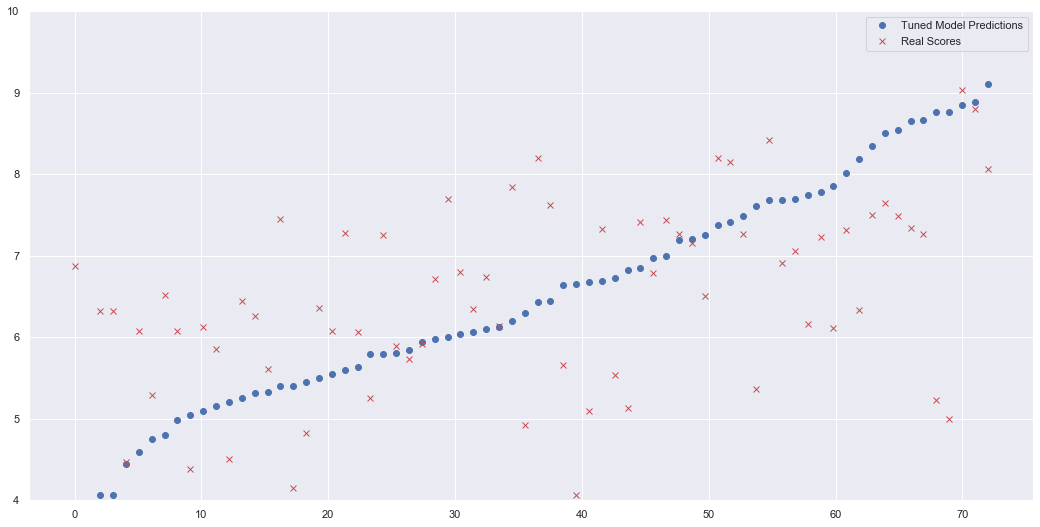

In [143]:
x_sup = np.linspace(0,len(untuned_predictions), len(untuned_predictions))
fig = plt.figure(figsize=(18,9))
_ = plt.plot(x_sup, pred_compare['real'], 'bo', x_sup, pred_compare['predictions'], 'rx')
plt.ylim(4,10)
plt.legend(['Tuned Model Predictions', 'Real Scores'])

In [154]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

                            
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LR_predictions = lin_reg.predict(X_test)
# Visualizing the Linear Regression results
# def viz_linear():
#     plt.scatter(X, y, color='red')
#     plt.plot(X, lin_reg.predict(X), color='blue')
#     plt.title('Truth or Bluff (Linear Regression)')
#     plt.xlabel('Position level')
#     plt.ylabel('Salary')
#     plt.show()
#     return
# viz_linear()

In [155]:
acc = MSE(LR_predictions, y_test)
print("LR: " + str(acc))


LR: 1.4890188663904078


In [156]:
pred_compare = pd.DataFrame({
    'real': y_test.values,
    'predictions': LR_predictions
})
pred_compare = pred_compare.sort_values('real')

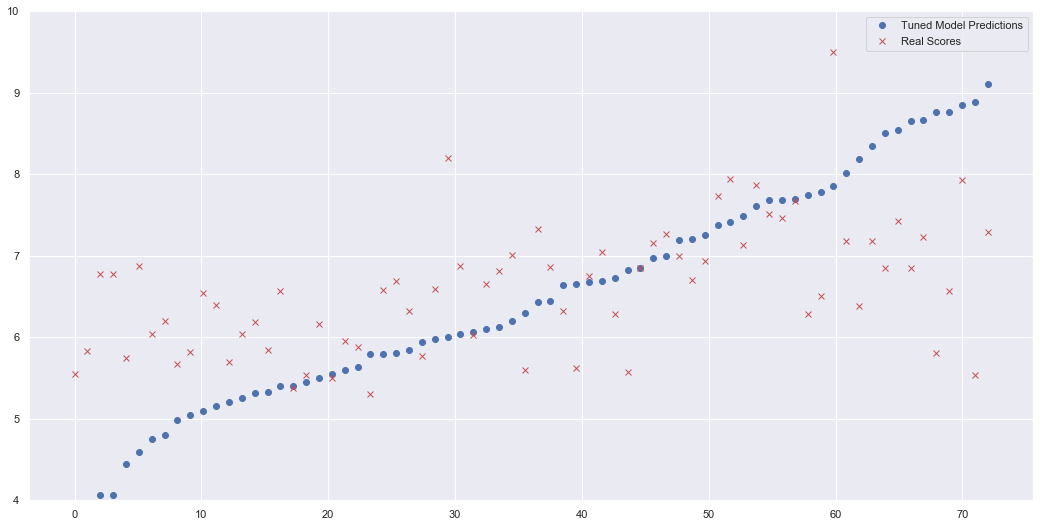

In [157]:
x_sup = np.linspace(0,len(LR_predictions), len(LR_predictions))
fig = plt.figure(figsize=(18,9))
_ = plt.plot(x_sup, pred_compare['real'], 'bo', x_sup, pred_compare['predictions'], 'rx')
plt.ylim(4,10)
plt.legend(['Tuned Model Predictions', 'Real Scores'])

In [158]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [159]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

In [160]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

ValueError: Found input variables with inconsistent numbers of samples: [167, 239]

In [168]:
X = np.array(df[['raceId','dnf','overtakings','top5_battle','rvp']])
print(X.shape)
# X = X.reshape(X.shape[1:])
# X = X.transpose()
y = np.array(df['points'])
y = y.reshape((y.shape[0],1))
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(239, 5)
(239, 1)


In [190]:
X = (df[['raceId','dnf','overtakings','top5_battle','rvp']])
print(X.shape)
# X = X.reshape(X.shape[1:])
# X = X.transpose()
y = np.array(df['points'])
y = y.reshape((y.shape[0],1))
print(y.shape)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X, y, test_size=0.3, random_state=42)

(239, 5)
(239, 1)


In [198]:
poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y_train)

# Obtain coefficients
lg.coef_

array([[0.        , 0.00049381, 0.1725762 , 0.01240057, 0.02395018,
        0.02826275]])

In [199]:
p_predict = lg.predict(X_test_)

In [201]:
acc = MSE(p_predict, y_test)
print("LR: " + str(acc))


LR: 1.4890188663904078


In [214]:
data = df[['dnf','overtakings','top5_battle','rvp','points']]

In [215]:
data.head()

,dnf,overtakings,top5_battle,rvp,points
0,6,228,27.911129,9,9.45
1,7,159,72.959473,11,9.44
2,1,191,31.969707,10,9.24
3,11,126,23.286327,19,9.19
4,6,160,41.467551,10,9.14


In [239]:
def scatter_plot(feature,target):
    plt.figure(figsize=(16,8))
    plt.scatter(
    data[feature],data[target],c='black')
    plt.xlabel(feature)
    plt.ylabel("Points")
    plt.show()

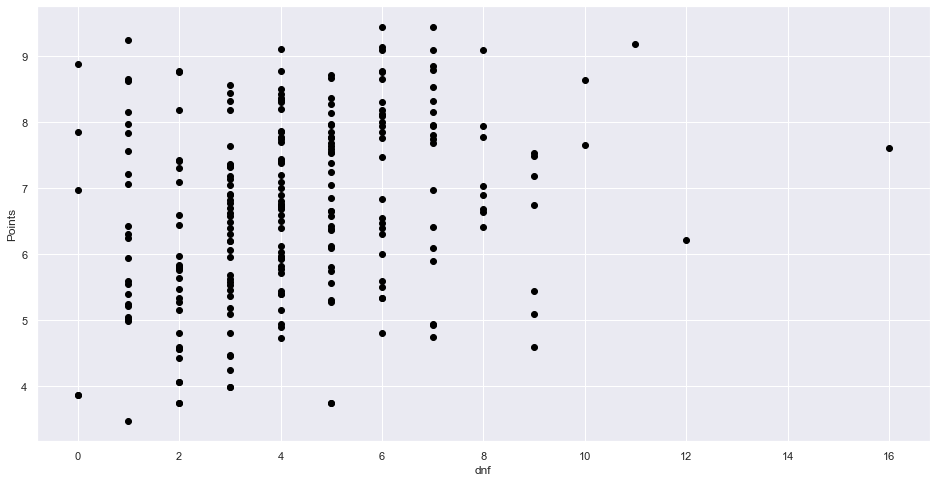

In [210]:
scatter_plot('dnf','points')

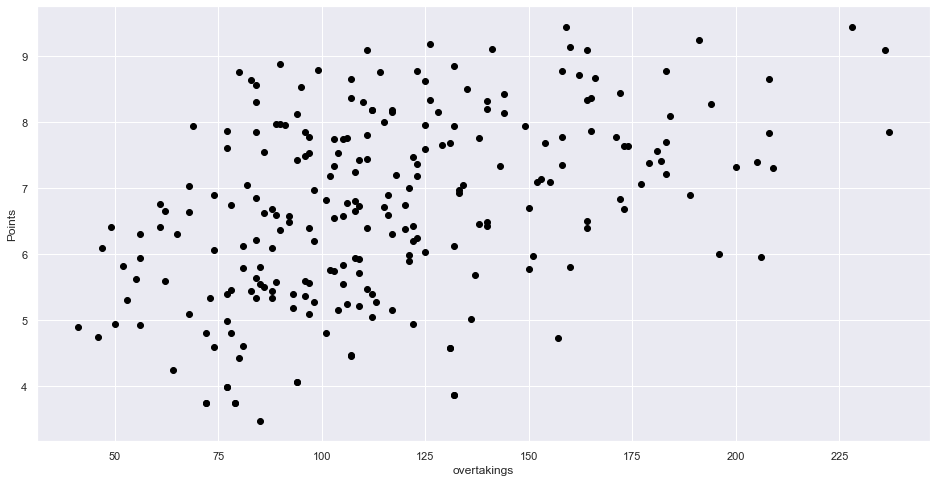

In [211]:
scatter_plot('overtakings','points')

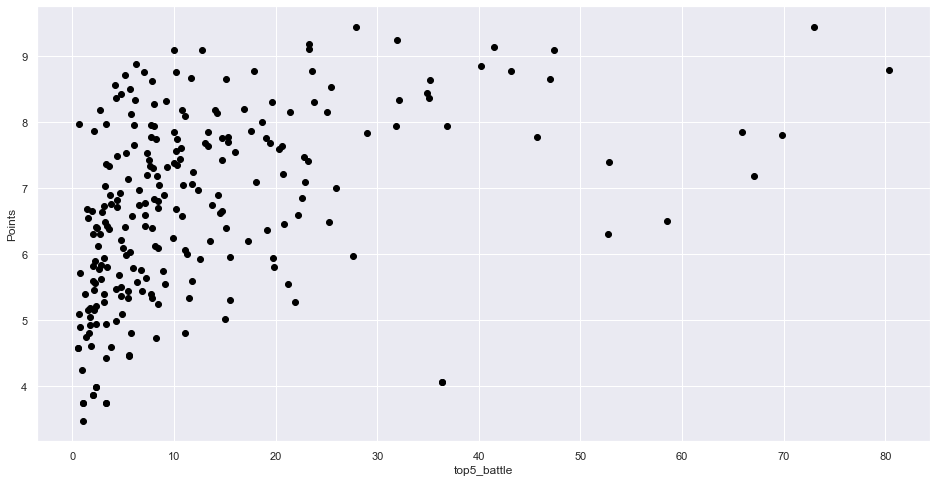

In [212]:
scatter_plot('top5_battle','points')

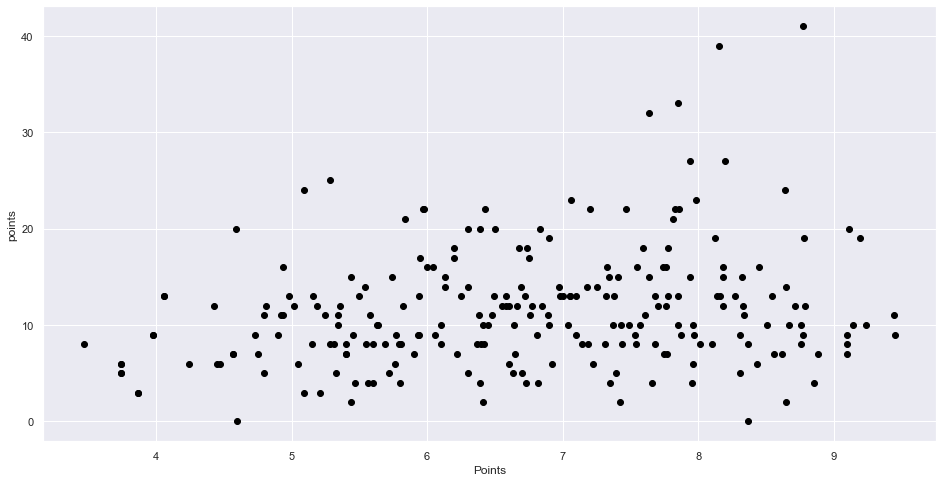

In [238]:
scatter_plot('points','rvp')

In [229]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['points'],axis = 1)
y = data['points'].values.reshape(-1,1)

lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg,Xs,y, scoring = 'neg_mean_squared_error',cv = 15)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

-1.4380534671315024


In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv = 15)
ridge_regressor.fit(Xs,y)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [231]:
print(ridge_regressor.best_params_)

{'alpha': 1e-15}


In [232]:
print(ridge_regressor.best_score_)

-1.437887827045336


In [233]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 15)
lasso_regressor.fit(Xs,y)

C:\Users\Parin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.97452765451858, tolerance: 0.03756253650224215

C:\Users\Parin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.33189787264068, tolerance: 0.043442301165919274

C:\Users\Parin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.9901131898397, tolerance: 0.044415174349775786

C:\Users\Parin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will cha

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [234]:
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [235]:
print(lasso_regressor.best_score_)

-1.437887827045336
